In [1]:
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = keras.models.load_model(r'A:\CODING\Python\Projects\face-mask-detector\model.h5')

## testing webcam

In [3]:
cap = cv2.VideoCapture(0)

In [9]:
while True:
    ret, frame = cap.read()
    cv2.imshow('myWindow', frame)
    if cv2.waitKey(1) & 0xFF==ord('x'):
        break
cv2.destroyAllWindows()

## Lets make a function that will overlap a text

In [4]:
def draw_label(img, text, pos, bg_color):
    font_scale = 0.8  # Adjust the font scale as needed
    thickness = 2  # Adjust the thickness as needed
    
    text_size = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)
    end_x = pos[0] + text_size[0][0] + 10
    end_y = pos[1] + text_size[0][1] + 10
    
    cv2.rectangle(img, pos, (end_x, end_y), bg_color, thickness=cv2.FILLED)
    cv2.putText(img, text, pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, color=(255, 255, 255), thickness=thickness, lineType=cv2.LINE_AA)    

## We trained our model like that :  Mask =0, No_mask =1

In [5]:
def detect_face_mask(img):
    img1 = cv2.resize(img,(224,224))
    y_pred = model.predict(img1.reshape(1, 224, 224, 3), verbose=0)
    if y_pred > 0.0000001: #After fine tunning found this perfect threshold for prediction
        return 1
    else:
        return 0

Mask


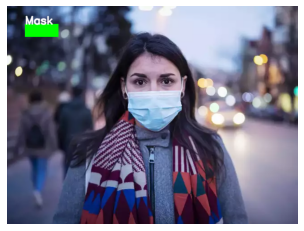

In [24]:
pic1 = cv2.imread(r"C:\Users\aashi\Downloads\1.jpg")
preds = detect_face_mask(pic1)
if preds==0:
    draw_label(pic1, "Mask", (40,40), (0,255,0))
    print("Mask")
else:
    draw_label(pic1, "No Mask", (40,40), (0,0,255))
    print("There is no mask")

image_rgb = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

There is no mask


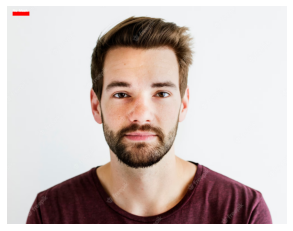

In [23]:
pic2 = cv2.imread(r"C:\Users\aashi\Downloads\face_Detection\human.jpg")
preds = detect_face_mask(pic2)
if preds==0:
    draw_label(pic2, "Mask", (40,40), (0,255,0))
    print("Mask")
else:
    draw_label(pic2, "No Mask", (40,40), (0,0,255))
    print("There is no mask")

image_rgb = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

## Lets test on webcam

In [7]:
while True:
    ret, frame = cap.read()
    preds = detect_face_mask(frame)
    if preds==0:
        draw_label(frame, "Mask", (40,40), (0,255,0))
    else:
        draw_label(frame, "No mask", (40,40), (0,0,255))
    cv2.imshow('myWindow', frame)
    if cv2.waitKey(1) & 0xFF==ord('x'):
        break
        
cv2.destroyAllWindows()

## Working great on webcam